# Agenda, week 5: Visualization

1. Q&A
2. Plotting in Python and with data
3. Line plots
4. Bar plots
5. Histograms
6. Pie plots
7. Scatter plots
8. Box plots
9. What's next?

# Plotting

When we plot, we're doing two things:

1. We're making our data more understandable to people who are new to it, and have to understand it,
2. We're making our data more understandable to *ourselves*!

How can I create plots?

The best-known library for plotting in Python is known as Matplotlib. (You can learn more at https://matplotlib.org/.) It's very powerful, open source, has been around for a while... and is VERY HARD TO LEARN, in my opinion.

Today, we are not going to be using Matplotlib... at least, not directly. Pandas has a plotting interface (i.e., it has methods and options) which are then translated into Matplotlib plots. Using Pandas, we can create plots with Matplotlib, but with a much simpler interface.

There are some other libraries that are gaining traction, and also wrap themselves around Matplotlib. One of the best known is Seaborn. You can also look at Plotly, which is (I think) a combination of Matplotlib and JavaScript, for Web pages.

# How can we plot with Pandas?

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

<Axes: >

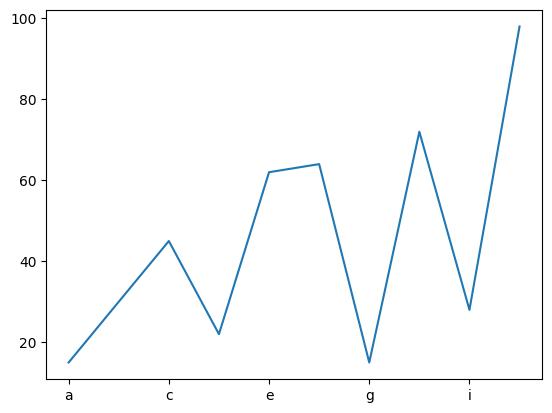

In [4]:
s = Series(np.random.randint(0, 100, 10),
          index=list('abcdefghij'))

s.plot.line()   # notice: series.plot.TYPE_OF_PLOT()

# Plots appear inside of Jupyter!

Now we can see that Jupyter can include:

- Code
- Data that the code analyzes
- Plots that are part of our analysis

If you find that the plots are not appearing inside of Jupyter, try the following magic command:

    %matplotlib inline
    
If you run that in a code cell by itself, then plots should show up inside of Jupyter. (Normally, I don't have to write this.)    

When we run `s.plot.line()`, Pandas creates a line plot:

- The x axis is based on our index (i.e., the names we gave to the rows)
- The y axis is based on the values
- Not all of the index values are displayed

We can pass a variety of keyword arguments to `plot.line` to customize our plot a bit.

<Axes: title={'center': 'My amazing plot'}>

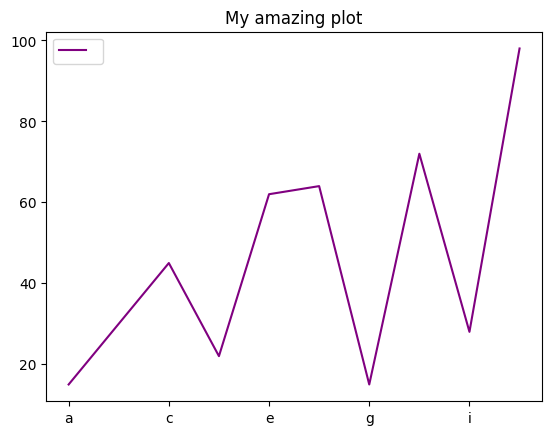

In [6]:
s.plot.line(title='My amazing plot', color='purple', legend=True)

In [7]:
# what if I want to plot a data frame?
# remember, each column in a data frame is a series

df = DataFrame({'a':[10, 20, 30, 40, 50],
               'b':[15, -5, 20, -10, 30]},
              index=list('vwxyz'))
df

,a,b
v,10,15
w,20,-5
x,30,20
y,40,-10
z,50,30


<Axes: >

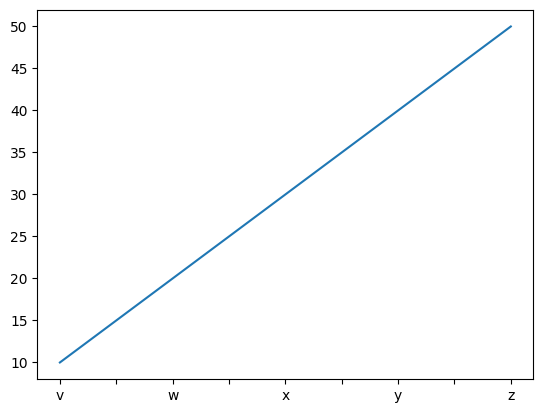

In [8]:
# what if I want to plot column a?
df['a'].plot.line()

<Axes: >

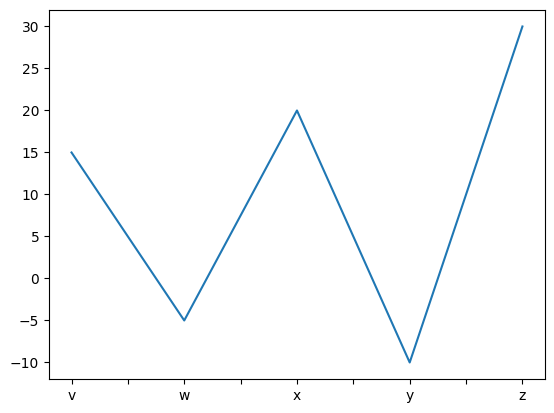

In [9]:
# plot column b?
df['b'].plot.line()

<Axes: >

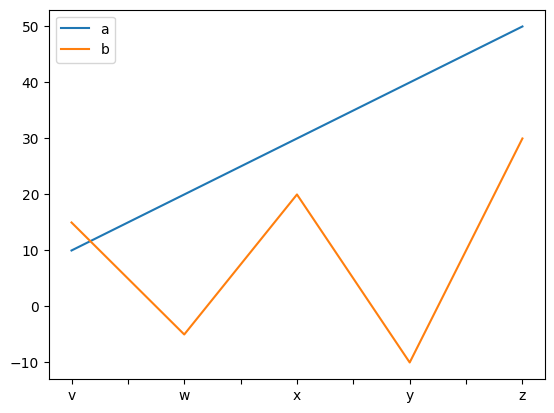

In [10]:
# what if I want to plot both of them?
# remember the rule of thumb for data frames: We can often run series methods
# on data frames. In such cases, the method is run on each of the columns, as a separate series

df.plot.line()

<Axes: >

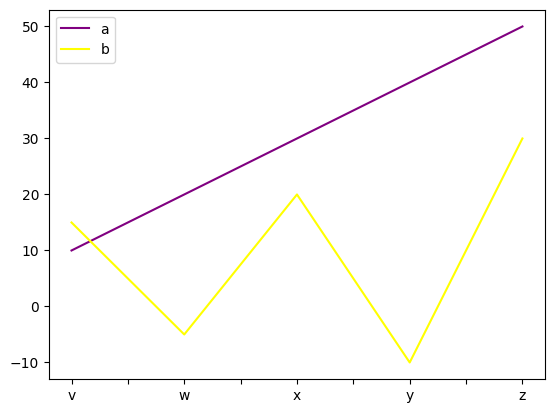

In [12]:
df.plot.line(color=['purple', 'yellow'])

<Axes: >

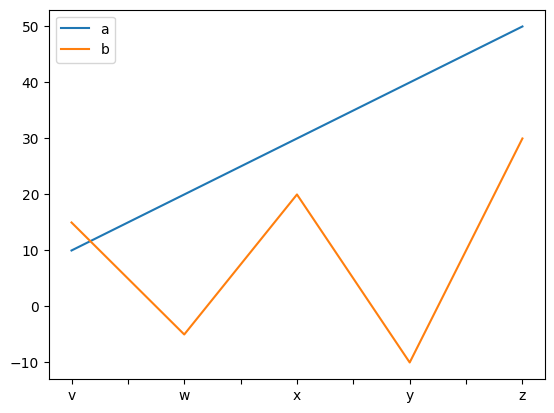

In [13]:
df[ ['a', 'b'] ].plot.line()  # select columns using fancy indexing

# Exercise: Weather plotting

1. Create a data frame with three columns for high temp, low temp, and precipitation. The index should be the days or dates over the next 10 days.  We're going to put together a data frame with the 10-day forecast.
2. Create a line plot for all three columns.
3. Create a line plot just for the high and low temps.

In [14]:
# create a data frame as a dict of lists
# each dict key is a column name, and each dict value is a list of numbers.

df = DataFrame({'high': [30, 35, 34, 30, 29, 29, 31, 31, 30],
                'low': [19, 25, 20, 18, 17, 18, 19, 19, 19],
               'precip':[0, 0, 0, 0, 0, 0, 0, 0, 0]})
df

,high,low,precip
0,30,19,0
1,35,25,0
2,34,20,0
3,30,18,0
4,29,17,0
5,29,18,0
6,31,19,0
7,31,19,0
8,30,19,0


<Axes: title={'center': '10-day forecast in Modiin'}>

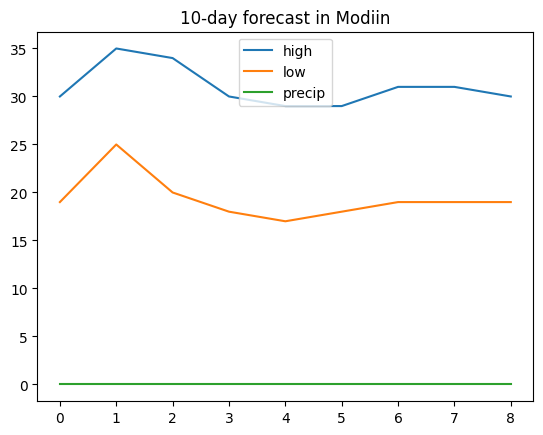

In [16]:
# create a line plot for all three
df.plot.line(title='10-day forecast in Modiin')

<Axes: >

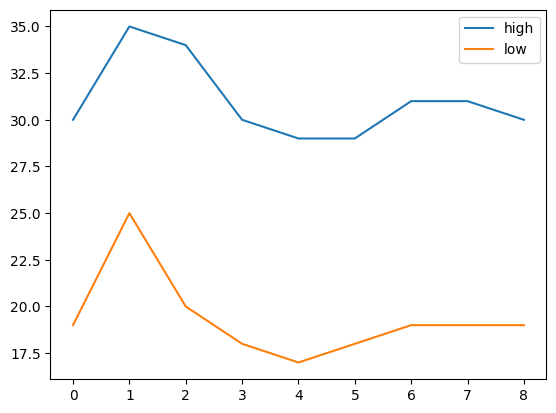

In [17]:
# only high and low temps

df[['high', 'low']].plot.line()

In [18]:
# create a data frame as a dict of lists
# each dict key is a column name, and each dict value is a list of numbers.

df = DataFrame({'high': [30, 35, 34, 30, 29, 29, 31, 31, 30],
                'low': [19, 25, 20, 18, 17, 18, 19, 19, 19],
               'precip':[0, 0, 0, 0, 0, 0, 0, 0, 0]},
              index='Wed Thu Fri Sat Sun Mon Tue Wed Thu'.split())
df

,high,low,precip
Wed,30,19,0
Thu,35,25,0
Fri,34,20,0
Sat,30,18,0
Sun,29,17,0
Mon,29,18,0
Tue,31,19,0
Wed,31,19,0
Thu,30,19,0


<Axes: >

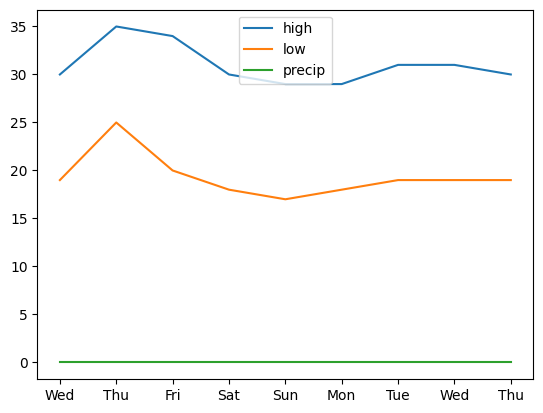

In [19]:
df.plot.line()

# Bar plots 

In a line plot, we have the individual points plotted, and the lines join them together so that we can see the trend. In a bar plot, we have a bar from the x axis up to the point that we're drawing. This allows us to compare distinct values more easily.

Note that if you have a large number of values, then both line plots and bar plots will give you trouble. 

<Axes: >

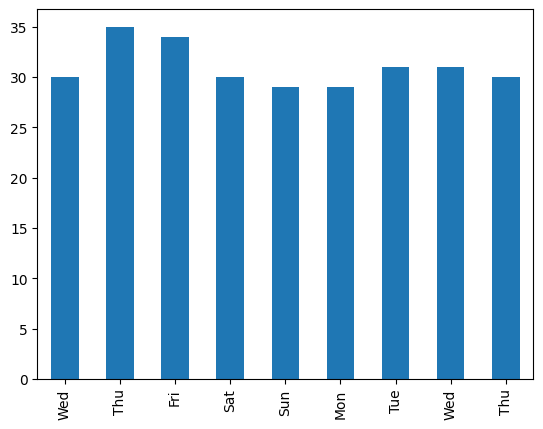

In [20]:
df['high'].plot.bar()  

<Axes: >

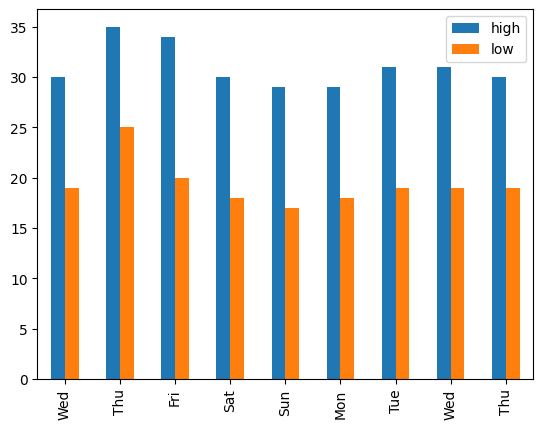

In [21]:
# what if I plot both of the columns? 

df[['high', 'low']].plot.bar()

<Axes: >

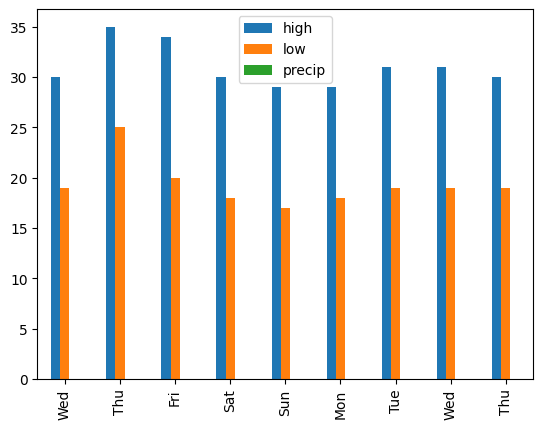

In [22]:
df.plot.bar()

<Axes: >

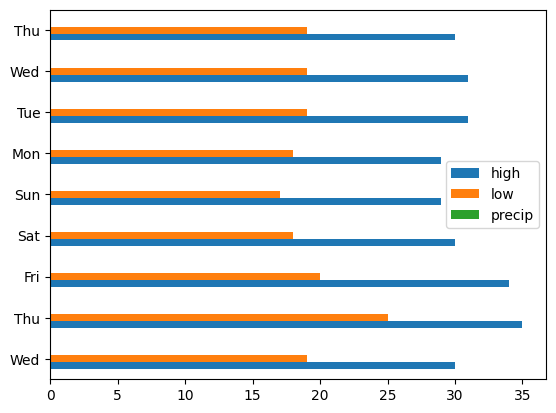

In [23]:
# sometimes, it's nicer to get the bar plot horizontal rather than vertical
# in such cases, we can use "barh"

df.plot.barh()

My problem with `barh` plots is that they (very logically) have the first values (i.e., the earliest indexes) at the *bottom* of the plot, and the latest indexes at the *top*. 

# Exercise: Taxi bar plots

1. Load our favorite `taxi.csv` file. We're only interested (for now) in `trip_distance` and `total_amount`.
2. Create a bar plot with both of these columns for the first 20 rides in the data frame.
3. Create a horizontal bar plot with both columns for the 20 longest rides in the data frame.

In [24]:
df = pd.read_csv('taxi.csv',
                usecols=['trip_distance', 'total_amount'])
df

,trip_distance,total_amount
0,1.63,17.80
1,0.46,8.30
2,0.87,11.00
3,2.13,17.16
4,1.40,10.30
...,...,...
9994,2.70,12.30
9995,4.50,20.30
9996,5.59,22.30
9997,1.54,7.80


<Axes: >

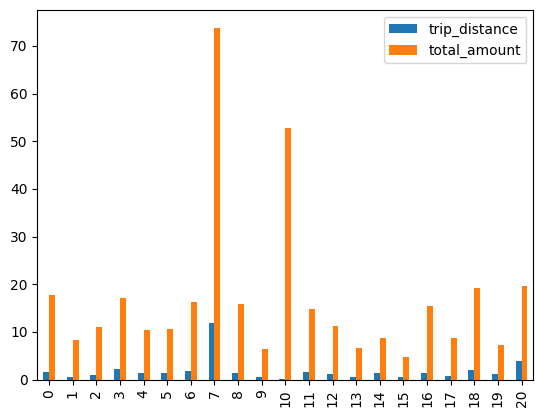

In [26]:
# Create a bar plot with both of these columns for the first 20 rides in the data frame.

df.loc[:20].plot.bar()

<Axes: >

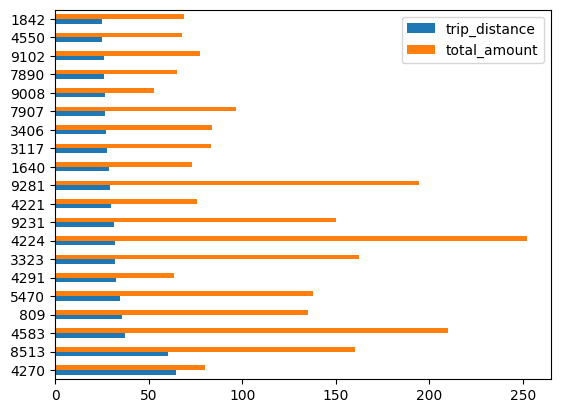

In [29]:
# Create a horizontal bar plot with both columns for the 20 longest rides in the data frame.

df.sort_values('trip_distance', ascending=False).head(20).plot.barh()

In [30]:
df = pd.read_csv('taxi.csv',
                usecols=['trip_distance', 'total_amount', 'tpep_pickup_datetime'],
                parse_dates=['tpep_pickup_datetime'],
                index_col='tpep_pickup_datetime')

df

,trip_distance,total_amount
tpep_pickup_datetime,,
2015-06-02 11:19:29,1.63,17.80
2015-06-02 11:19:30,0.46,8.30
2015-06-02 11:19:31,0.87,11.00
2015-06-02 11:19:31,2.13,17.16
2015-06-02 11:19:32,1.40,10.30
...,...,...
2015-06-01 00:12:59,2.70,12.30
2015-06-01 00:12:59,4.50,20.30
2015-06-01 00:13:00,5.59,22.30


<Axes: ylabel='tpep_pickup_datetime'>

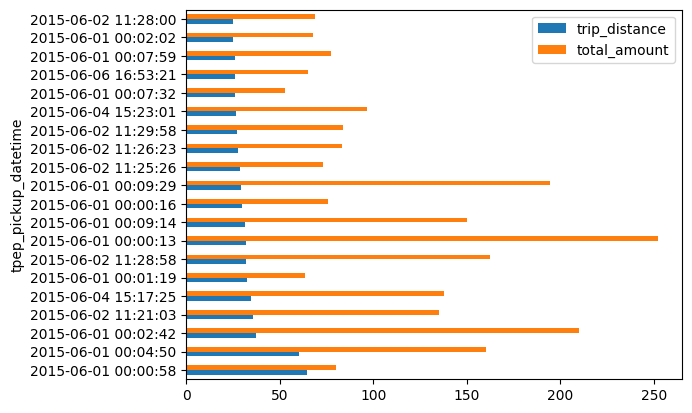

In [31]:
df.sort_values('trip_distance', ascending=False).head(20).plot.barh()

In [32]:
# read in all taxi data
df = pd.read_csv('taxi.csv')
df = df.head(20)  # grab the first 20 elements

In [33]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

<Axes: >

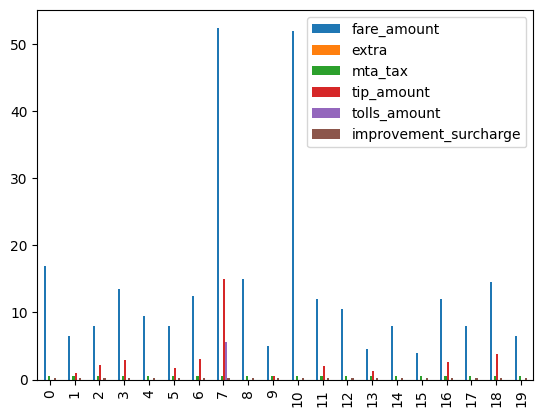

In [35]:
# total_amount = 
# 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'

df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']].plot.bar()

<Axes: >

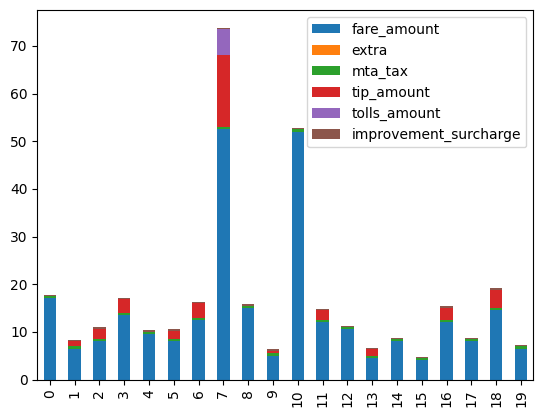

In [36]:
# this is ugly!
# let's try something else: a *STACKED* bar plot
# all of the columns will be added together, each with its own color, into a singl ebar

df[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']].plot.bar(stacked=True)

# Next up

1. Histograms
2. Pie plots

# Histograms

Sometimes, we want to know what the distribution of our data looks like. Meaning: If we take all of the values in our data, and we count how many times we have the value 1, how many 2, how many 3, etc., we can create a bar plot. But the plot isn't showing the values themselves, but rather how often each value appears.

In [37]:
s = Series([10, 20, 30, 20, 30, 20, 20, 20, 30])

# I want to know how often each value appers in our series
# if I'm in Pandas, I can just run value_counts

s.value_counts()

20    5
30    3
10    1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

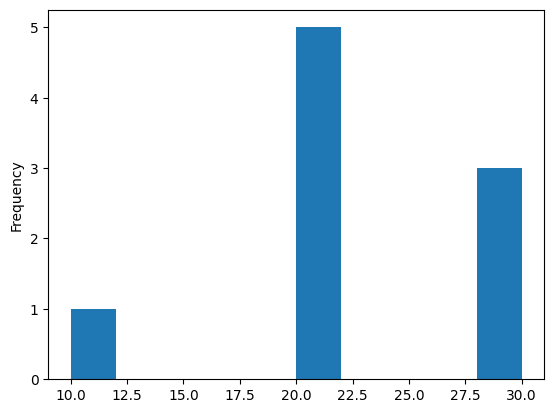

In [38]:
# the graphical version of that is a histogram
# it'll show that 20 appeared 5 times, 30 appeared 3 times, and 10 appeared 1 time

s.plot.hist()

# What's going on in this picture?

It's true (and good) that the x axis represents our values, and the y axis represents the frequency with which those values are in our data set.

But... what if we have 100 different values? What if we have 1,000 different values? And besides, why are the bars not quite aligned with 10, 20, and 30?

Answer: Histograms work by "binning" our data into groups. It'll look at our data and divide the range of values into 10 bins. It'll count how many times we have values in the first bin, the second bin, etc.

This means that a histogram (unlike a bar plot or line plot, which we looked at before) is just fine with a huge number of data points.

In [39]:
s = Series(np.random.randint(0, 1000, 1000))  # 1,000 data points in this series, each from 0-1,000.

In [40]:
s

0      273
1      289
2       13
3      284
4      962
      ... 
995    112
996     59
997    340
998    140
999    795
Length: 1000, dtype: int64

<Axes: ylabel='Frequency'>

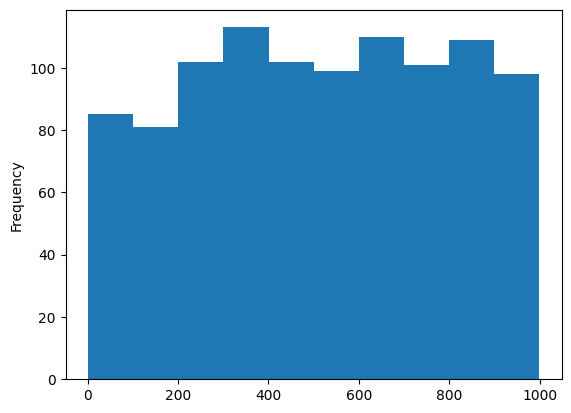

In [41]:
s.plot.hist()

In an ideal data set, we'll have a standard distribution (aka a bell curve) with the most values at (or near) the mean, and then fewer and fewer on either side.

If you want, you can ask Pandas to use a different number of bins, by passing `bins=n`, where `n` is an integer.

<Axes: ylabel='Frequency'>

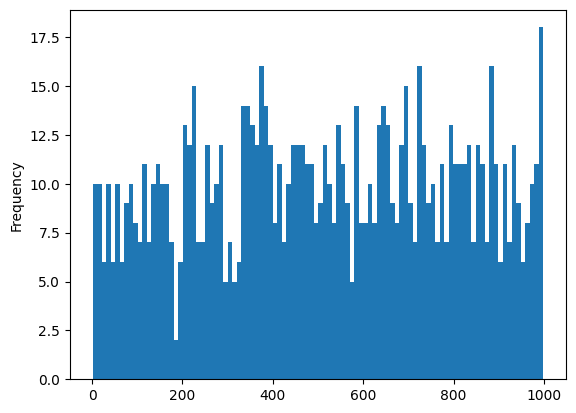

In [43]:
s.plot.hist(bins=100)

# Exercise: Histograms

1. Load the taxi data into a data frame. We're only interested in `passenger_count`, `trip_distance`, and `total_amount`.
2. Create a histogram for each of these columns, separately. What can you say about the distribution of data?
3. What happens if you try to create a histogram for both `trip_distance` and `total_amount` in the same plot?

In [44]:
df = pd.read_csv('taxi.csv',
                usecols=['passenger_count', 'trip_distance', 'total_amount'])
df.head()

,passenger_count,trip_distance,total_amount
0,1,1.63,17.80
1,1,0.46,8.30
2,1,0.87,11.00
3,1,2.13,17.16
4,1,1.40,10.30


<Axes: ylabel='Frequency'>

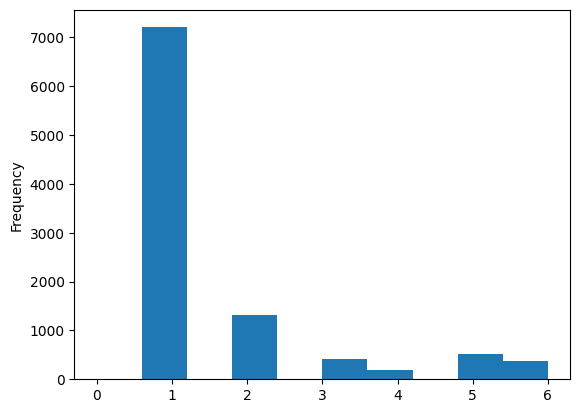

In [45]:
df['passenger_count'].plot.hist()

<Axes: ylabel='Frequency'>

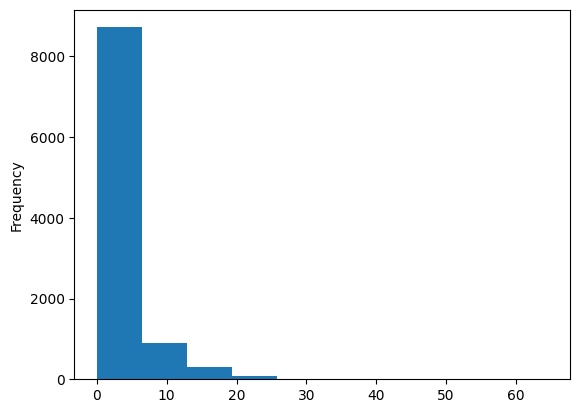

In [46]:
df['trip_distance'].plot.hist()

<Axes: ylabel='Frequency'>

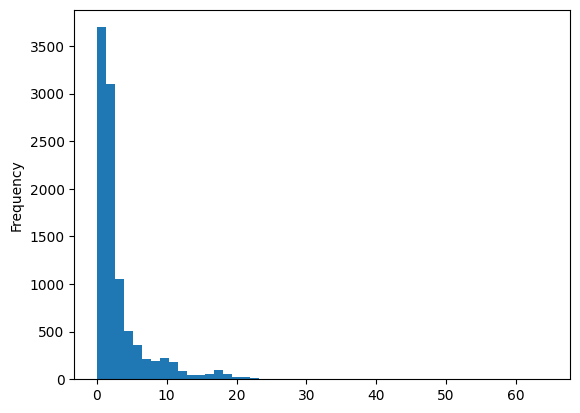

In [48]:
df['trip_distance'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

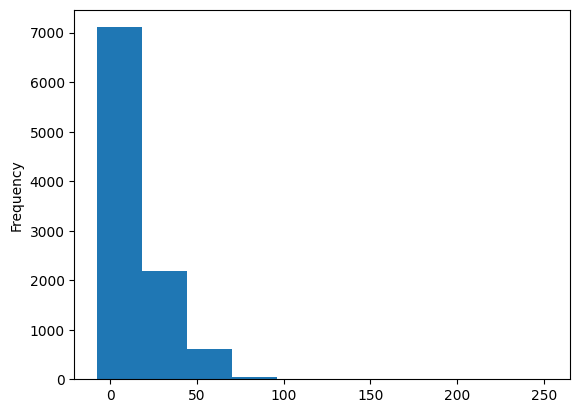

In [49]:
df['total_amount'].plot.hist()

In [50]:
# how about tip_amount out of total_amount

df = pd.read_csv('taxi.csv',
                usecols=['passenger_count', 'trip_distance', 'tip_amount','total_amount'])
df.head()

,passenger_count,trip_distance,tip_amount,total_amount
0,1,1.63,0.00,17.80
1,1,0.46,1.00,8.30
2,1,0.87,2.20,11.00
3,1,2.13,2.86,17.16
4,1,1.40,0.00,10.30


<Axes: ylabel='Frequency'>

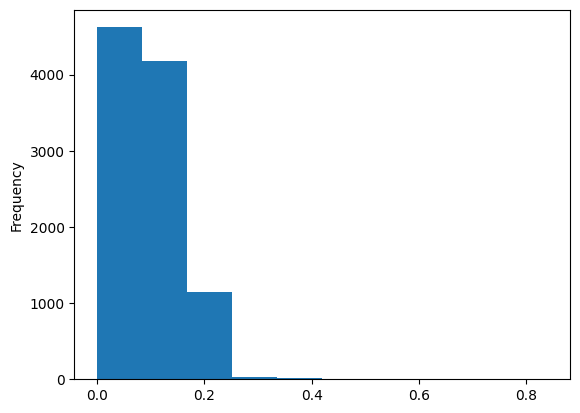

In [52]:
(df['tip_amount'] / df['total_amount']).plot.hist()

<Axes: ylabel='Frequency'>

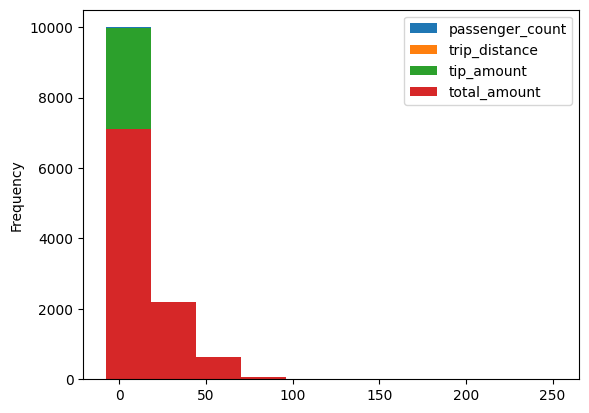

In [54]:
# how about plotting all three/four histograms together?

# it puts them on the same plot
# one of them will be in "front" and block us from seeing the others

df.plot.hist()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

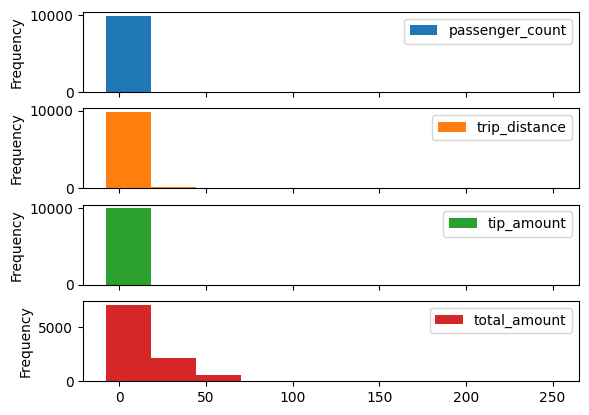

In [55]:
# if we want to break each column's plot into a separate plot,
# we can pass subplots=True

df.plot.hist(subplots=True)

# Pie plots

There are definitely cases where it's useful to see different values as a percentage of a whole. One way to show these percentages is with pie plots, where each percentage is displayed as a slice of pie, with the total pie being 100%.

In [56]:
# how much did each region sell of our widgets?

sales = Series([50, 75, 200, 18],
              index=list('abcd'))
sales

a     50
b     75
c    200
d     18
dtype: int64

In [57]:
sales.sum()

343

In [58]:
sales / sales.sum()

a    0.145773
b    0.218659
c    0.583090
d    0.052478
dtype: float64

<Axes: >

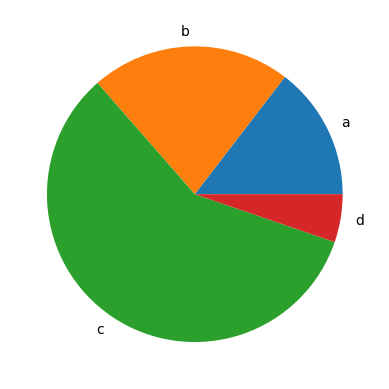

In [59]:
# I can show this visually with a pie plot

sales.plot.pie()

Histograms are a visual version of `value_counts`. Pie plots are a visual version of `value_counts(normalize=True)`, which shows percentages rather than counts.

Only use a pie plot where the things can/should be added together. For example, you don't want to have a pie plot for the temperatures predicted for the coming week! If we do that, Pandas will sum the temperatures and then show us what proportion of the total temperature (what ever that means) is predicted for each day.

Also: You'll have one pie slice for every value in the series! You might well need to run `value_counts` on the values, and then create the pie plot from that.

In [62]:
df = DataFrame({'high': [30, 35, 34, 30, 29, 29, 31, 31, 30],
                'low': [19, 25, 20, 18, 17, 18, 19, 19, 19],
               'precip':[0, 0, 0, 0, 0, 0, 0, 0, 0]},
              index='Wed Thu Fri Sat Sun Mon Tue Wed Thu'.split())
df

,high,low,precip
Wed,30,19,0
Thu,35,25,0
Fri,34,20,0
Sat,30,18,0
Sun,29,17,0
Mon,29,18,0
Tue,31,19,0
Wed,31,19,0
Thu,30,19,0


<Axes: ylabel='high'>

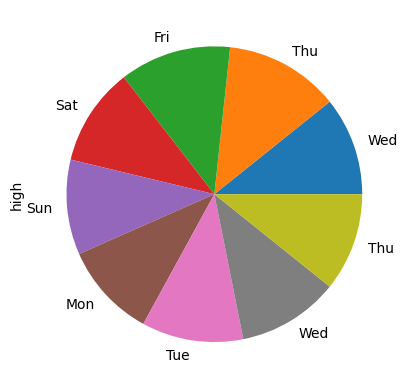

In [63]:

df['high'].plot.pie()   # Pandas is willing to go along with this foolishness!

<Axes: ylabel='count'>

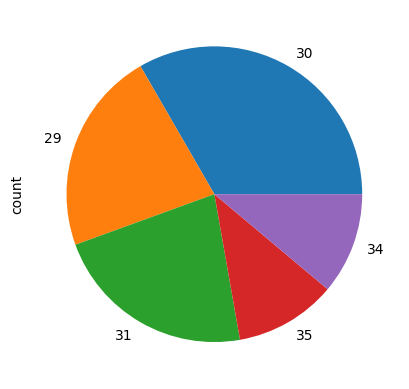

In [64]:
# however, we could use value_counts to find out how often each high
# temp will occur, and then show that as a percentage with a pie plot

df['high'].value_counts().plot.pie()

# Exercise: Pie plots

1. Load the taxi data into a data frame. Once again, we're only interested in `passenger_count`, `trip_distance`, and `total_amount`.
2. Create a pie plot showing how often each number of passengers occurs in our data.
3. Create a pie plot showing how often each distance occurs in our data. However, don't use `trip_distance` as is. Rather, use the integer you get back after dividing it by 10.  A trip of 2.5 miles will be 0, and a trip of 15.3 miles will be 1.  This should give us a smaller number of pie slices.

In [66]:
df = pd.read_csv('taxi.csv',
                usecols=['passenger_count', 'trip_distance', 'total_amount'])
df.head()

,passenger_count,trip_distance,total_amount
0,1,1.63,17.80
1,1,0.46,8.30
2,1,0.87,11.00
3,1,2.13,17.16
4,1,1.40,10.30


<Axes: ylabel='passenger_count'>

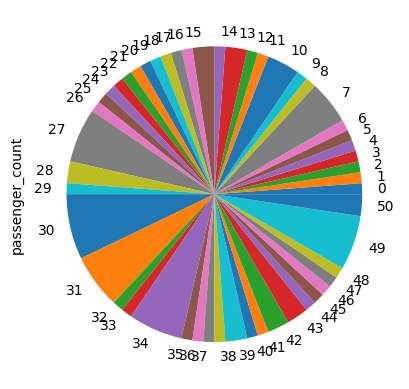

In [67]:
# Create a pie plot showing how often each number of passengers occurs in our data.

# What *NOT* to do:

df.loc[:50, 'passenger_count'].plot.pie()

In [68]:
df['passenger_count'].value_counts()

passenger_count
1    7207
2    1313
5     520
3     406
6     369
4     182
0       2
Name: count, dtype: int64

<Axes: ylabel='count'>

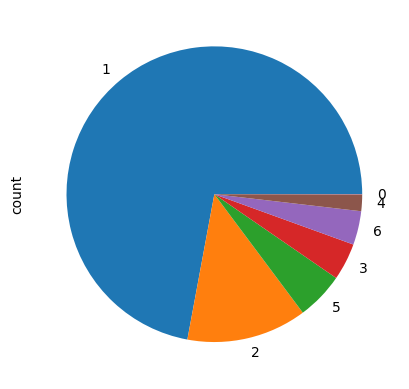

In [69]:
df['passenger_count'].value_counts().plot.pie()

<Axes: ylabel='count'>

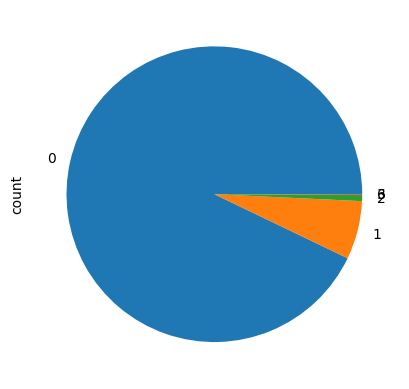

In [75]:
# Create a pie plot showing how often each distance occurs in our data. However, don't use trip_distance as is. Rather, use the integer you get back after dividing it by 10. A trip of 2.5 miles will be 
# 0, and a trip of 15.3 miles will be 1. This should give us a smaller number of pie slices.

(df['trip_distance'] / 10).astype(np.int64).value_counts().plot.pie()


<Axes: ylabel='count'>

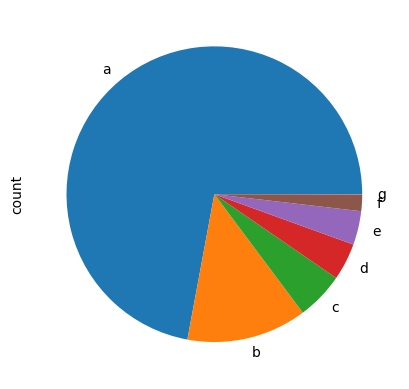

In [78]:
# labels are taken from the index on which we plot
# I can change that, providing different labels
df['passenger_count'].value_counts().plot.pie(labels=list('abcdefg'))

<Axes: ylabel='count'>

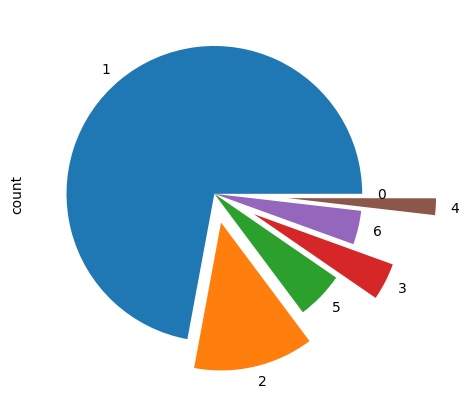

In [82]:
# what if we want one or more pie slices to come out of the pie chart?
# we can do that with the "explode" keyword argument, which takes a list.
# the list contains floats, starting at 0, indicating how much to explode each pie piece.

df['passenger_count'].value_counts().plot.pie(explode=[0,0.2,0,0.3,0,0.5,0])


# Next up

1. Scatter plots!
2. Correlations
3. Scatter matrix

# Scatter plots

When we're looking at data, it's pretty common for us to have two different columns in a data frame that are related in some way. We want to know: How closely related are they? Are they correlated with one another?

Remember: Correlation ≠ causation!

Meaning: If we find that two values are correlated with one another -- when one goes up, the other goes up (or when one goes up, the other goes down) -- this does not mean that one causes the other.

Correlation is normally reported as a number between -1 and +1:

- If the correlation is -1, then when one number goes up, the other goes down. (For example, as the temperature goes up, the amount of snowfall goes down.)
- If the correlation is +1, then when one number goes up, the other goes up, too. (For example, as wages go up, spending goes up, too.) 
- If the correlation is 0, then we don't see any connection between the two.

We'll see in a bit how we can calculate these correlations. Sometimes, it's useful just to plot two columns against one another. If we see that the dots show a line/diagonal pointing up and to the right, then we can say that they are positively correlated. (That's not the way to calculate it!) If the dots show a line/diagonal pointing down and to the right, then they are negatively correlated.

If you don't see any obvious pattern, then they aren't highly correlated.

An example could be our temperature forecast from before.

In [83]:
# Is there a correlation between high and low temperatures?
# that is, if high temperatures go up, do low temperatures go up, too?

df = DataFrame({'high': [30, 35, 34, 30, 29, 29, 31, 31, 30],
                'low': [19, 25, 20, 18, 17, 18, 19, 19, 19],
               'precip':[0, 0, 0, 0, 0, 0, 0, 0, 0]},
              index='Wed Thu Fri Sat Sun Mon Tue Wed Thu'.split())
df

,high,low,precip
Wed,30,19,0
Thu,35,25,0
Fri,34,20,0
Sat,30,18,0
Sun,29,17,0
Mon,29,18,0
Tue,31,19,0
Wed,31,19,0
Thu,30,19,0


<Axes: xlabel='high', ylabel='low'>

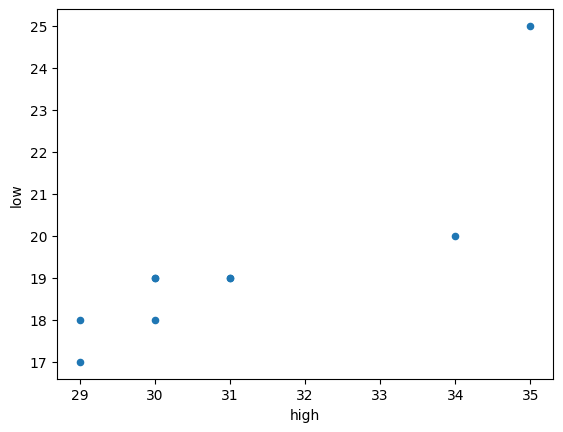

In [84]:
# we'll plot a dot for every index (row) in our data frame
# - x axis will be from the "high" column
# - y axis will be from the "low" column
# let's see what it looks like!

df.plot.scatter(x='high', y='low')

# Exercise: Scatter plots

1. Load the taxi data. We will, once again, use `passenger_count`, `trip_distance`, and `total_amount`.
2. Plot `trip_distance` vs. `total_amount`. What do you predict the plot will look like? What does it?
3. Plot `passenger_count` vs. `total_amount`. What do you predict the plot will look like? What does it?

In [85]:
df = pd.read_csv('taxi.csv',
                usecols=['passenger_count', 'trip_distance', 'total_amount'])
df

,passenger_count,trip_distance,total_amount
0,1,1.63,17.80
1,1,0.46,8.30
2,1,0.87,11.00
3,1,2.13,17.16
4,1,1.40,10.30
...,...,...,...
9994,1,2.70,12.30
9995,1,4.50,20.30
9996,1,5.59,22.30
9997,6,1.54,7.80


<Axes: xlabel='trip_distance', ylabel='total_amount'>

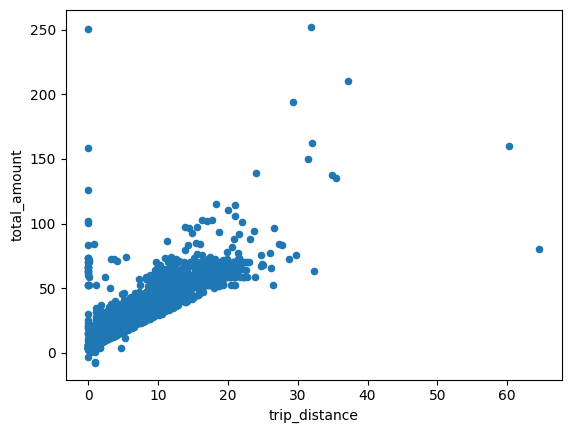

In [86]:
# here, I'm asking the question: If I travel farther in a taxi, do I pay more?

df.plot.scatter(x='trip_distance', y='total_amount')

<Axes: xlabel='passenger_count', ylabel='total_amount'>

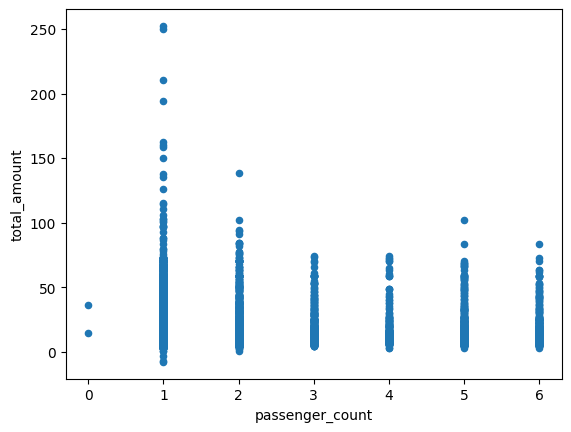

In [87]:
# here, I'm asking the question: If I more passengers, do I pay more?

df.plot.scatter(x='passenger_count', y='total_amount')

# Let's add another dimension to our scatter plot

Right now, we're plotting two columns, one on the x axis and one on the y axis.

It might be nice, when plotting, to show a third piece of data. We can do that using *color*.

If we pass the `c` keyword argument, giving it a column that contains categorical values, Pandas (or Matplotlib) looks at all of the values, and then gives each plot point a color based on the category.

<Axes: xlabel='trip_distance', ylabel='total_amount'>

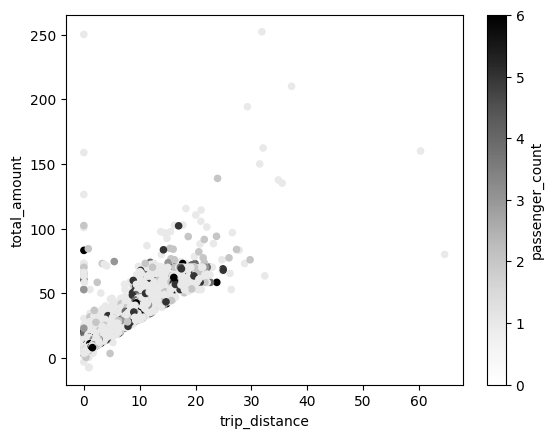

In [88]:
df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count')

ValueError: 'asdfsafafsafsaf' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

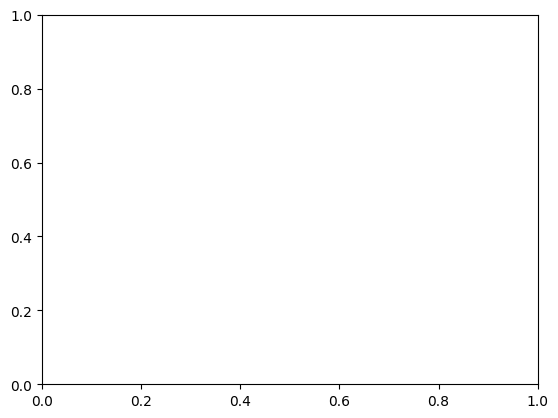

In [89]:
# I'd like to change how the values of passenger_count are mapped to a color
# for this, we need to provide Pandas with the name of a colormap
# (this will be a string.)

# If you know of one, use it! If you don't, put garbage into the `colormap` keyword argument,
# and you will get a list of what's acceptable in the error message.

df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count', colormap='asdfsafafsafsaf')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

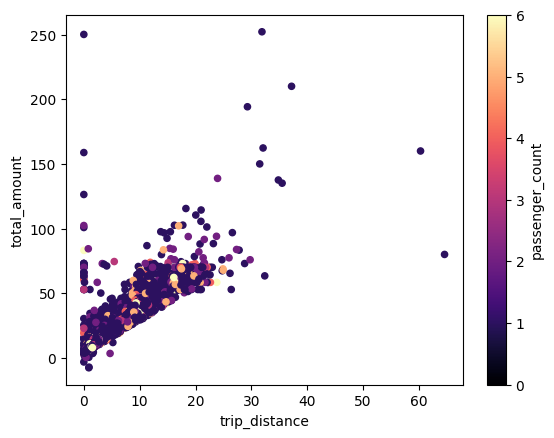

In [90]:
df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count', colormap='magma')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

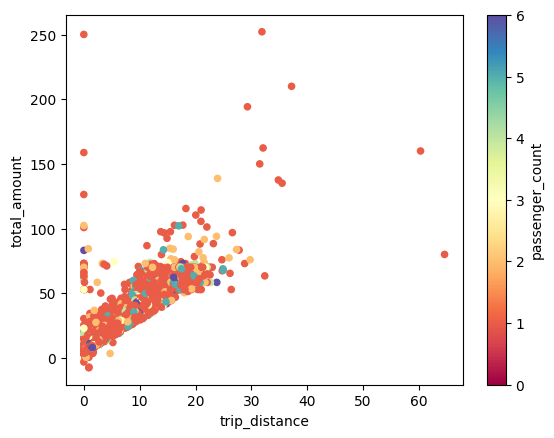

In [91]:
df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count', colormap='Spectral')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

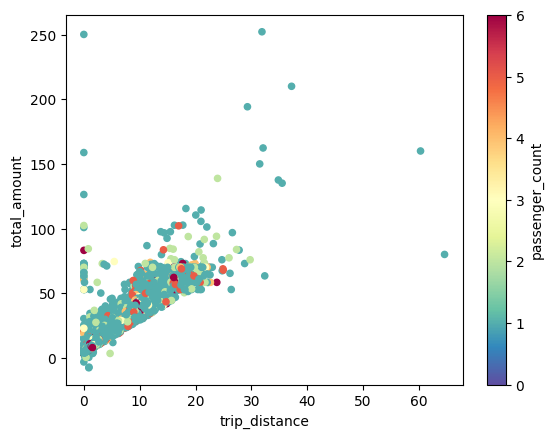

In [92]:
df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count', colormap='Spectral_r')

In [93]:
!ls *.csv

burrito_current.csv	   oecd_locations.csv	       taxi.csv
celebrity_deaths_2016.csv  oecd_tourism.csv	       titanic3.csv
languages.csv		   olympic_athlete_events.csv


# Exercise: Scatter plots with colors

1. Read the taxi data into a data frame. We'll want `trip_distance`, `total_amount`, `tip_amount`, and `payment_type`.
2. Create a scatter plot comparing `trip_distance` and `total_amount`, colorizing via `payment_type`. Try a few colormaps. Which seems to work best?
3. Create a scatter plot comparing `total_amount` with `tip_amount`. What do we see?

<Axes: xlabel='trip_distance', ylabel='total_amount'>

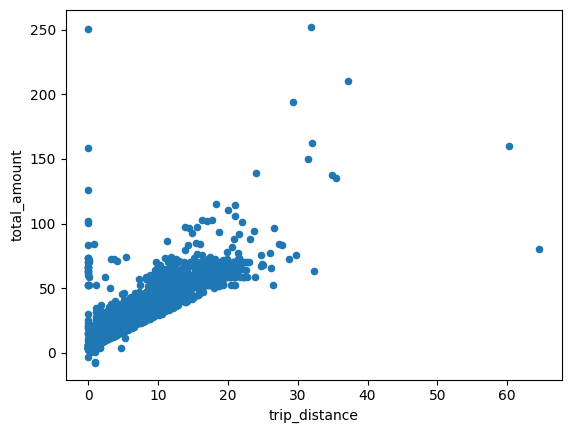

In [94]:
df = pd.read_csv('taxi.csv',
                usecols=['trip_distance', 'total_amount', 'tip_amount', 'payment_type'])

df.plot.scatter(x='trip_distance', y='total_amount')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

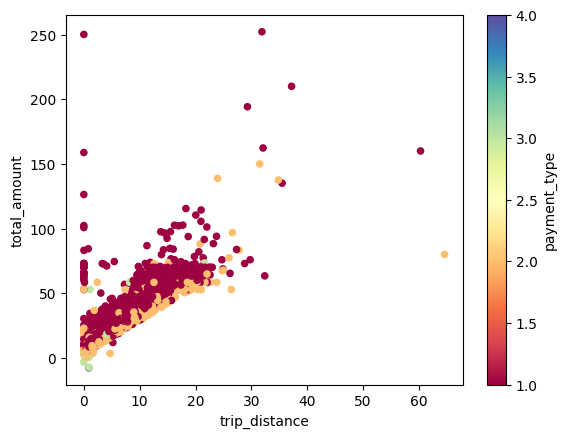

In [97]:
df.plot.scatter(x='trip_distance', y='total_amount', c='payment_type', colormap='Spectral')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

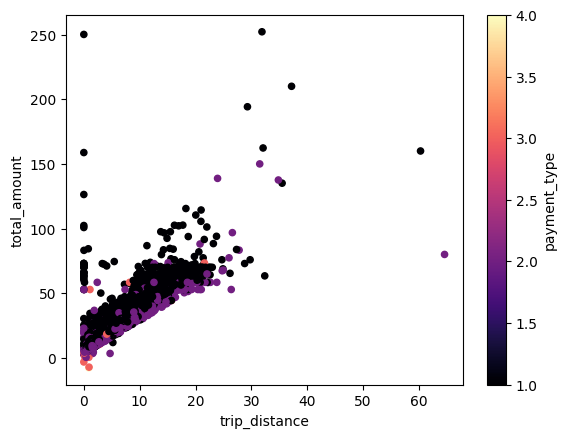

In [99]:
df.plot.scatter(x='trip_distance', y='total_amount', c='payment_type', colormap='magma')

In [100]:
# to calculate the correlation across columns, use: 

df.corr()

,trip_distance,payment_type,tip_amount,total_amount
trip_distance,1.000000,-0.083705,0.523592,0.880843
payment_type,-0.083705,1.000000,-0.559975,-0.192280
tip_amount,0.523592,-0.559975,1.000000,0.703293
total_amount,0.880843,-0.192280,0.703293,1.000000


array([[<Axes: xlabel='trip_distance', ylabel='trip_distance'>,
        <Axes: xlabel='payment_type', ylabel='trip_distance'>,
        <Axes: xlabel='tip_amount', ylabel='trip_distance'>,
        <Axes: xlabel='total_amount', ylabel='trip_distance'>],
       [<Axes: xlabel='trip_distance', ylabel='payment_type'>,
        <Axes: xlabel='payment_type', ylabel='payment_type'>,
        <Axes: xlabel='tip_amount', ylabel='payment_type'>,
        <Axes: xlabel='total_amount', ylabel='payment_type'>],
       [<Axes: xlabel='trip_distance', ylabel='tip_amount'>,
        <Axes: xlabel='payment_type', ylabel='tip_amount'>,
        <Axes: xlabel='tip_amount', ylabel='tip_amount'>,
        <Axes: xlabel='total_amount', ylabel='tip_amount'>],
       [<Axes: xlabel='trip_distance', ylabel='total_amount'>,
        <Axes: xlabel='payment_type', ylabel='total_amount'>,
        <Axes: xlabel='tip_amount', ylabel='total_amount'>,
        <Axes: xlabel='total_amount', ylabel='total_amount'>]],
      dtype

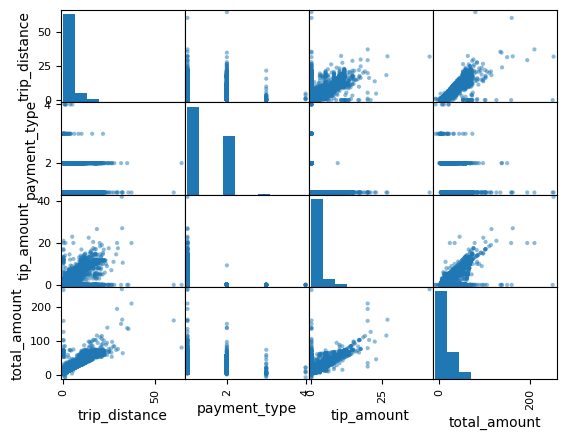

In [101]:
# correlations are really interesting and useful.
# so are scatter plots.

# let's combine them!

# we can use

from pandas.plotting import scatter_matrix

scatter_matrix(df)

# Next up

1. Boxplots
2. A little Seaborn
3. Your questions -- what can I answer?
4. What next? 

# Boxplots (aka "box and whisker plots")

John Tukey (sp?) was a statistician at Princeton (I think) who came up with many ideas in modern statistics. Among them, he said that you can describe a data set with a number of descriptive statistics -- mean, std, min, 25%, median, 75%, and max.  That's why we have a `describe` method in Pandas, which gives us all of those calculations. They help us to understand our data.

A boxplot is a graphical version of the `describe` method. It allows us to get a sense of the shape of our data.

In [102]:
# I'll take my weather forecast:

df = DataFrame({'high': [30, 35, 34, 30, 29, 29, 31, 31, 30],
                'low': [19, 25, 20, 18, 17, 18, 19, 19, 19],
               'precip':[0, 0, 0, 0, 0, 0, 0, 0, 0]},
              index='Wed Thu Fri Sat Sun Mon Tue Wed Thu'.split())
df

,high,low,precip
Wed,30,19,0
Thu,35,25,0
Fri,34,20,0
Sat,30,18,0
Sun,29,17,0
Mon,29,18,0
Tue,31,19,0
Wed,31,19,0
Thu,30,19,0


In [103]:
# let's describe the high temps

df['high'].describe()

count     9.00000
mean     31.00000
std       2.12132
min      29.00000
25%      30.00000
50%      30.00000
75%      31.00000
max      35.00000
Name: high, dtype: float64

<Axes: >

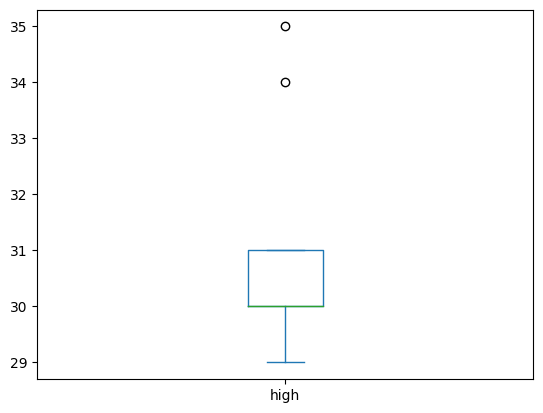

In [104]:
# let's create a  boxplot from the data

df['high'].plot.box()

# What the heck?

A boxplot has several parts:

- The minimum value is drawn with a horizontal line. (We see that at 29.)
- The maximum value is drawn with another horizontal line. (We see that at 31.)
- The 25% and 75% are drawn as the bottom and top of a box. (That's the "box" in the boxplot.)
- The median is drawn with a green line, which here overlaps with the 25% line.

Any value that is 2.5 * the IQR (meaning, the difference between 75% and 25%) is considered an "outlier," and is drawn as a circle outside of our main boxplot.

# Where can and should we use boxplots?

They're especially useful for comparing data sets with one another. That is: If I have two columns in my data set, and I'm worried that they aren't on the same scale, I can plot them against each other and quickly see what's going on.

Why would I care? Some calculations (especially in the world of machine learning) are very sensitive to inputs that are on wildly different scales.

<Axes: >

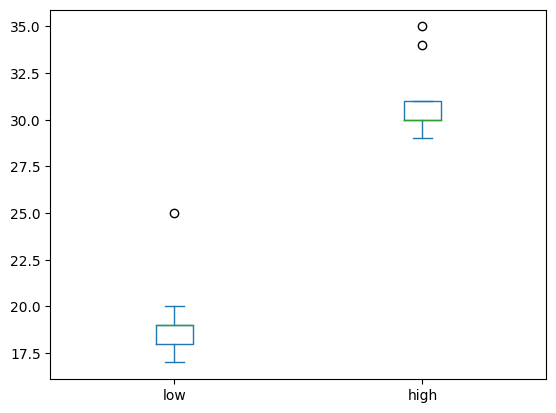

In [105]:
df[['low', 'high']].plot.box()

low        Axes(0.125,0.11;0.352273x0.77)
high    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

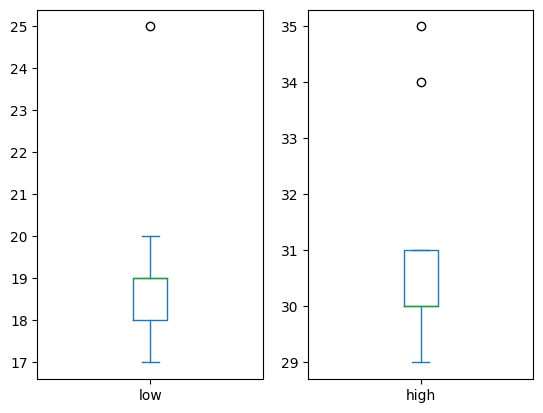

In [106]:
df[['low', 'high']].plot.box(subplots=True)

# Exercise: Boxplots

1. Load our taxi data, including `total_amount`, `trip_distance`, and `passenger_count`.
2. Create a boxplot with all three columns. What can you say about each column? What can you say about the relationship among their numeric spreads?
3. If you use subplots, what do you gain? What do you lose?

In [ ]:
df = pd.read_csv('taxi.csv',
                usecols=)